# <center> Scintific Segmentation (K-Means Clustering) <center>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA  

In [48]:
# reading data into dataframe
telco= pd.read_csv("telco_csv.csv")

In [49]:
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,callwait,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,1,0,3.70,0.00,0.0,7.50,0.0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,1,1,1,4.40,20.75,0.0,15.25,35.7,0,4
2,3,68,52,1,24,116,1,29,0,1,...,1,0,1,18.15,18.00,0.0,30.25,0.0,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,9.45,0.00,0.0,0.00,0.0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,1,1,6.30,0.00,0.0,0.00,0.0,0,3


In [50]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   int64  
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   int64  
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   int64  
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   int64  
 9   gender    1000 non-null   int64  
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   int64  
 12  equip     1000 non-null   int64  
 13  callcard  1000 non-null   int64  
 14  wireless  1000 non-null   int64  
 15  multline  1000 non-null   int64  
 16  voice     1000 non-null   int64  
 17  pager     1000 non-null   int64  
 18  internet  1000 non-null   int64  
 19  callid    1000 non-null   int64  
 20  callwait  1000 non-null   int64

In [51]:
telco_new = pd.get_dummies(telco, columns=['region'], drop_first=True, prefix='region') #one hot encoding

In [52]:
telco_new = pd.get_dummies(telco_new, columns=['custcat'], drop_first=True, prefix='cust_cat') #one hot encoding

In [53]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

telco_new=telco_new.apply(lambda x: Missing_imputation(x))

In [54]:
#Handling Outliers - Method2
def outlier_capping(x):
    #x = x.clip_upper(x.quantile(0.99))
    #x = x.clip_lower(x.quantile(0.01))
    x = x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99))
    return x

telco_new=telco_new.apply(lambda x: outlier_capping(x))

In [55]:
telco_new.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ',
       'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'multline', 'voice', 'pager', 'internet', 'callid',
       'callwait', 'forward', 'confer', 'longmon', 'tollmon', 'equipmon',
       'cardmon', 'wiremon', 'ebill', 'region_2', 'region_3', 'cust_cat_2',
       'cust_cat_3', 'cust_cat_4'],
      dtype='object')

In [56]:
report = pandas_profiling.ProfileReport(telco_new)

In [57]:
#report.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
telco_new.drop(columns = ['wireless', 'equip'], axis=1, inplace=True)

In [59]:
telco_new.columns

Index(['tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ',
       'retire', 'gender', 'reside', 'tollfree', 'callcard', 'multline',
       'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer',
       'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'ebill',
       'region_2', 'region_3', 'cust_cat_2', 'cust_cat_3', 'cust_cat_4'],
      dtype='object')

In [60]:
telco_new.apply(lambda x: x.std()/x.mean())

tenure        0.601244
age           0.298635
marital       1.010556
address       0.866175
income        1.051168
ed            0.457655
employ        0.910415
retire        4.505207
gender        0.967042
reside        0.607365
tollfree      1.053952
callcard      0.689494
multline      1.051841
voice         1.513858
pager         1.683524
internet      1.311149
callid        1.039270
callwait      1.030979
forward       1.014607
confer        0.996506
longmon       0.813820
tollmon       1.213176
equipmon      1.335655
cardmon       0.983225
wiremon       1.670858
ebill         1.302734
region_2      1.412801
region_3      1.381624
cust_cat_2    1.900502
cust_cat_3    1.600400
cust_cat_4    1.800147
dtype: float64

## Dimension Reduction - Principle Component Analysis (PCA)

In [61]:
#standardize the data

sc = StandardScaler()
sc = sc.fit(telco_new)
telco_new_std = pd.DataFrame(sc.transform(telco_new), columns = telco_new.columns)

In [62]:
telco_new_std

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,tollmon,equipmon,cardmon,wiremon,ebill,region_2,region_3,cust_cat_2,cust_cat_3,cust_cat_4
0,-1.055125,0.189446,1.010051,-0.252674,-0.126231,1.087753,-0.597197,-0.222076,-1.034598,-0.229045,...,-0.824695,-0.749071,-0.457615,-0.598794,-0.768001,1.412095,-0.724148,-0.526440,-0.625156,-0.555788
1,-1.148806,-0.695476,1.010051,-0.453208,0.802534,1.906227,-0.597197,-0.222076,-1.034598,2.607427,...,0.484856,-0.749071,0.121006,1.275872,-0.768001,-0.708168,1.380933,-0.526440,-0.625156,1.799247
2,1.521092,0.833025,1.010051,1.251336,0.544543,-1.367671,1.811218,-0.222076,0.966559,-0.229045,...,0.311301,-0.749071,1.240918,-0.598794,-0.768001,-0.708168,1.380933,-0.526440,1.599600,-0.555788
3,-0.118319,-0.695476,-0.990050,0.048128,-0.526115,-0.549196,-1.098950,-0.222076,0.966559,-0.938163,...,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001,1.412095,-0.724148,-0.526440,-0.625156,-0.555788
4,-0.586722,-0.936819,1.010051,-0.252674,-0.564814,-1.367671,-0.898249,-0.222076,-1.034598,1.189191,...,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001,1.412095,-0.724148,-0.526440,1.599600,-0.555788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.195646,-0.212792,-0.990050,-1.155079,-0.603512,0.269278,-1.098950,-0.222076,0.966559,0.480073,...,-0.824695,0.786918,-1.017571,-0.598794,1.302082,-0.708168,1.380933,-0.526440,-0.625156,-0.555788
996,-1.336167,-0.615029,-0.990050,-0.954544,-0.668010,1.906227,-0.597197,-0.222076,0.966559,-0.938163,...,-0.824695,0.604503,-1.017571,-0.598794,-0.768001,-0.708168,-0.724148,-0.526440,-0.625156,-0.555788
997,1.474252,1.396158,-0.990050,2.855612,4.988164,1.906227,2.212621,-0.222076,0.966559,-0.938163,...,1.194853,2.135204,1.651553,2.856472,1.302082,-0.708168,1.380933,-0.526440,-0.625156,1.799247
998,1.614773,0.591683,-0.990050,0.649732,0.170458,-0.549196,1.108764,-0.222076,0.966559,-0.938163,...,1.289519,-0.749071,0.867614,-0.598794,-0.768001,-0.708168,1.380933,-0.526440,1.599600,-0.555788


In [63]:
#unsupervised: variable reduction techniques
# VIF, Correlation matrics, PCA

pca_model = PCA(n_components = 31)
pca_model = pca_model.fit(telco_new_std)

In [70]:
sum(pca_model.explained_variance_ )

31.031031031031006

### Eigen values

In [71]:
pca_model.explained_variance_     #Eigen values

array([6.77013025, 4.78341929, 3.31412841, 1.83467437, 1.53052666,
       1.22930544, 1.16630311, 1.05515958, 0.98893493, 0.80700982,
       0.64685593, 0.63554891, 0.62285257, 0.56587134, 0.48598171,
       0.47555484, 0.42865392, 0.41802091, 0.37881644, 0.37617771,
       0.35595549, 0.33130609, 0.30272385, 0.28221347, 0.2390415 ,
       0.23202489, 0.21376531, 0.19589731, 0.18857033, 0.10807647,
       0.06753017])

In [69]:
pca_model.explained_variance_ratio_

array([0.21817291, 0.15414954, 0.10680046, 0.05912386, 0.04932246,
       0.03961536, 0.03758506, 0.03400337, 0.03186923, 0.02600654,
       0.02084545, 0.02048108, 0.02007193, 0.01823566, 0.01566115,
       0.01532514, 0.01381372, 0.01347106, 0.01220767, 0.01212263,
       0.01147095, 0.01067661, 0.00975552, 0.00909456, 0.00770331,
       0.00747719, 0.00688876, 0.00631295, 0.00607683, 0.00348285,
       0.00217621])

In [27]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.21817291, 0.37232245, 0.47912291, 0.53824677, 0.58756923,
       0.62718459, 0.66476965, 0.69877302, 0.73064224, 0.75664878,
       0.77749424, 0.79797531, 0.81804724, 0.8362829 , 0.85194405,
       0.86726919, 0.88108291, 0.89455397, 0.90676164, 0.91888427,
       0.93035522, 0.94103182, 0.95078734, 0.9598819 , 0.96758521,
       0.97506239, 0.98195115, 0.9882641 , 0.99434093, 0.99782379,
       1.        ])

In [28]:
#Criteria to choose number of compoents
  #  1. Cumulative should be more than 75%
  #  2. Individual component should explain more than 0.8 variancce
#number of components = 10  

In [29]:
pca_model = PCA(n_components = 10)
pca_model = pca_model.fit(telco_new_std)

In [33]:
PCs = pd.DataFrame(pca_model.transform(telco_new_std), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [34]:
PCs     # you are able to reduce dimesnisons of 65% (from 31 to 10 ) by loosing the information about 24% - Dimension Reduction

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.092534,0.027242,-0.925089,0.305884,1.498236,0.465412,0.419967,-1.247394,0.463253,1.117082
1,3.040497,-2.021769,-1.908615,1.728544,-1.298968,1.792716,0.609612,-0.994714,0.624110,-0.434059
2,1.410831,4.041476,-0.386972,0.507273,-1.599251,0.855219,-0.122875,0.132110,-0.785055,0.425545
3,-3.409922,0.099793,-0.896921,-1.098074,1.515874,0.018309,0.502563,0.086038,-1.232993,-0.908517
4,-1.573053,0.602176,-3.046962,1.418619,1.582917,0.336340,0.080598,0.234281,1.253522,0.314462
...,...,...,...,...,...,...,...,...,...,...
995,-3.328991,-1.898386,-0.876512,-0.952394,-1.436188,0.561996,0.515139,0.552684,-0.545406,0.144194
996,-3.325861,-1.466522,-0.929096,-1.465550,0.009668,0.291330,-0.203943,0.507073,-0.714097,0.260466
997,6.574905,-0.125750,4.509397,-2.635840,-1.271449,2.870094,-1.609048,-0.316973,-0.710010,0.523458
998,2.599703,3.290276,-0.822275,-0.810482,-1.740049,-0.462767,-0.705769,0.147763,-1.056535,-0.145410


In [35]:
#Build segmentation - Input: PCs

In [78]:
pca_model.components_

array([[ 1.17582261e-01,  9.80028321e-02,  2.96984106e-02,
         8.29282275e-02,  1.24165471e-01,  6.02572262e-02,
         1.16727031e-01,  3.53335870e-02, -3.08173354e-03,
         1.02090799e-02,  2.90011890e-01,  2.20302452e-01,
         8.67293821e-02,  2.36941959e-01,  2.46839499e-01,
         6.76055134e-02,  2.85439682e-01,  2.85297180e-01,
         2.84745130e-01,  2.79896874e-01,  1.11730990e-01,
         3.06236739e-01,  1.27562472e-01,  2.02489007e-01,
         2.81042217e-01,  3.94838055e-02,  9.46504082e-04,
         3.26764537e-03, -1.54558248e-01,  9.92244591e-02,
         2.69910179e-01],
       [ 2.47344397e-01,  2.68391715e-01, -2.83574336e-03,
         2.44276550e-01,  1.14481140e-01, -2.52109051e-01,
         2.78705799e-01,  1.54115129e-01,  4.39977222e-03,
        -7.92170737e-02,  3.23948411e-02,  1.42965962e-01,
        -5.99213961e-02, -1.99189231e-01, -2.17588310e-01,
        -2.97596595e-01,  2.19587063e-02,  3.52114641e-02,
         2.49452554e-02,  4.24

In [36]:
#Loading matrics

Loadings =  pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T,columns=telco_new.columns).T

Loadings.columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10' ]

In [37]:
Loadings.to_csv('Loadings.csv')

In [38]:
Final_list = ['tollmon',
'voice',
'longmon',
'employ',
'multline',
'reside',
'region_2',
'income',
'retire',
'gender'
]

In [39]:
#seg_input = telco_new_std[Final_list]  # variable reduction output
seg_input = PCs   #Dimension Reduction output

In [40]:
#KMeans Clustering   input: standardized data, number of cluster

km_3 = KMeans(n_clusters=3, random_state=123).fit(seg_input)

In [41]:
km_3.labels_   #Segment labels

array([2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 0, 2, 2,
       0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0,
       0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2,
       0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2,
       1, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 2, 1,
       2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2,
       1, 0, 2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 1,
       0, 1, 1, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 1,

In [42]:
km_3.cluster_centers_

array([[ 3.32426328, -2.08320215,  0.3938718 , -0.07267566,  0.07821178,
         0.19160252,  0.45196843, -0.18590884, -0.10720281, -0.23449753],
       [ 1.12934325,  2.05796002, -1.35650415,  0.09075318, -0.10246696,
        -0.2543531 , -0.47890038,  0.29974947,  0.16502461,  0.3158379 ],
       [-2.256121  , -0.20900361,  0.60716719, -0.0184156 ,  0.0226353 ,
         0.05740598,  0.06436163, -0.08677273, -0.04544615, -0.07292259]])

In [43]:
km_3 = KMeans(n_clusters=3, random_state=123).fit(seg_input)
km_4 = KMeans(n_clusters=4, random_state=123).fit(seg_input)
km_5 = KMeans(n_clusters=5, random_state=123).fit(seg_input)
km_6 = KMeans(n_clusters=6, random_state=123).fit(seg_input)
km_7 = KMeans(n_clusters=7, random_state=123).fit(seg_input)
km_8 = KMeans(n_clusters=8, random_state=123).fit(seg_input)

In [44]:
telco_new['Cluster_3'] = km_3.labels_
telco_new['Cluster_4'] = km_4.labels_
telco_new['Cluster_5'] = km_5.labels_
telco_new['Cluster_6'] = km_6.labels_
telco_new['Cluster_7'] = km_7.labels_
telco_new['Cluster_8'] = km_8.labels_

In [45]:
telco_new.head()

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,region_3,cust_cat_2,cust_cat_3,cust_cat_4,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8
0,13,44.0,1,9.0,64.0,4,5.0,0,0,2.0,...,0,0,0,0,2,2,0,5,5,4
1,11,33.0,1,7.0,136.0,5,5.0,0,0,6.0,...,1,0,0,1,0,1,3,0,2,0
2,68,52.0,1,24.0,116.0,1,29.0,0,1,2.0,...,1,0,1,0,1,3,4,4,3,1
3,33,33.0,0,12.0,33.0,2,0.0,0,1,1.0,...,0,0,0,0,2,2,0,5,5,4
4,23,30.0,1,9.0,30.0,1,2.0,0,0,4.0,...,0,0,1,0,1,2,1,1,0,2


In [38]:
#To finding the optimal solution (optimal value of k), we follow below approaches
    #1. Using SC metrics/Elbow Analysis
    #2. Using profiling
    #3. Best practices

### Silhoutte Score

In [39]:
silhouette_score(seg_input, km_4.labels_)

0.21555374215157974

In [41]:
# calculate SC for K=3 through K=12
k_range = range(3, 8)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(seg_input)
    scores.append(silhouette_score(seg_input, km.labels_))

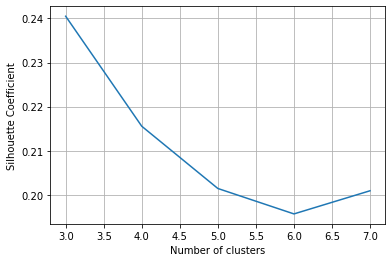

In [42]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
scores

In [ ]:
#based on sc score, the solution K=3, the second solution can be k=4

### Elbow Analysis 

In [44]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( seg_input )
    cluster_errors.append( clusters.inertia_ )

In [45]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,23455.989764
1,2,18121.941413
2,3,14855.194457
3,4,13347.221343
4,5,12405.260233
5,6,11566.247342
6,7,10961.735818
7,8,10362.189181
8,9,9982.916512
9,10,9737.163883


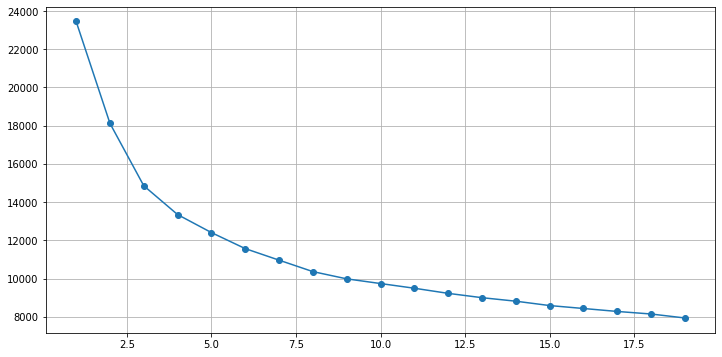

In [46]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

### Segment Distribution

In [47]:
telco_new.tenure.count()

1000

In [48]:
telco_new.Cluster_3.value_counts().sort_index()/sum(telco_new.Cluster_3.value_counts())

0    0.484
1    0.232
2    0.284
Name: Cluster_3, dtype: float64

In [49]:
#K=3, K=4
seg_dist = pd.concat([pd.Series(telco_new.Cluster_3.count())/telco_new.Cluster_3.count(),
           telco_new.Cluster_3.value_counts().sort_index()/sum(telco_new.Cluster_3.value_counts()),
           telco_new.Cluster_4.value_counts().sort_index()/sum(telco_new.Cluster_4.value_counts()),
           telco_new.Cluster_5.value_counts().sort_index()/sum(telco_new.Cluster_5.value_counts()),
           telco_new.Cluster_6.value_counts().sort_index()/sum(telco_new.Cluster_6.value_counts()),
           telco_new.Cluster_7.value_counts().sort_index()/sum(telco_new.Cluster_7.value_counts()),
           telco_new.Cluster_8.value_counts().sort_index()/sum(telco_new.Cluster_8.value_counts())])

In [50]:
agg = pd.concat([telco_new.apply(np.mean).T,
           telco_new.groupby('Cluster_3').apply(np.mean).T,
           telco_new.groupby('Cluster_4').apply(np.mean).T,
           telco_new.groupby('Cluster_5').apply(np.mean).T,
           telco_new.groupby('Cluster_6').apply(np.mean).T,
           telco_new.groupby('Cluster_7').apply(np.mean).T,
           telco_new.groupby('Cluster_8').apply(np.mean).T], axis=1)
           

In [51]:
pd.DataFrame(seg_dist).T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
0,1.0,0.484,0.232,0.284,0.316,0.229,0.182,0.273,0.208,0.107,...,0.116,0.197,0.141,0.081,0.151,0.209,0.042,0.108,0.15,0.118


In [52]:
profiling = pd.concat([pd.DataFrame(seg_dist).T, agg],axis=0)

In [53]:
profiling.columns = ['overall',
                    'KM3_1', 'KM3_2', 'KM3_3',
                    'KM4_1', 'KM4_2', 'KM4_3','KM4_4',
                    'KM5_1', 'KM5_2', 'KM5_3','KM5_4', 'KM5_5',
                    'KM6_1', 'KM6_2', 'KM6_3','KM6_4', 'KM6_5', 'KM6_6',
                    'KM7_1', 'KM7_2', 'KM7_3','KM7_4', 'KM7_5', 'KM7_6','KM7_7',
                    'KM8_1', 'KM8_2', 'KM8_3','KM8_4', 'KM8_5', 'KM8_6', 'KM8_7', 'KM8_8']

In [54]:
profiling.to_csv('profiling.csv')

### Predicting segment for new data

In [55]:
new = pd.read_csv('Telco_new_cust.csv')

In [56]:
new.drop(columns = ['wireless', 'equip'], axis=1, inplace=True)

In [57]:
new1 = pd.get_dummies(new, columns=['region'], drop_first=True, prefix='region') #one hot encoding

new1 = pd.get_dummies(new1, columns=['custcat'], drop_first=True, prefix='cust_cat') #one hot encoding

In [58]:
new1

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,tollmon,equipmon,cardmon,wiremon,ebill,region_2,region_3,cust_cat_2,cust_cat_3,cust_cat_4
0,38,55,1,12,135,2,24,0,0,4,...,31.75,0.00,16.25,0.00,1,0,0,0,0,1
1,59,26,1,3,41,4,1,0,1,3,...,0.00,35.10,46.75,29.15,0,0,1,1,0,0
2,54,55,0,1,587,3,33,0,0,1,...,0.00,0.00,0.00,0.00,0,1,0,0,1,0
3,9,40,0,13,38,4,7,0,1,1,...,21.00,42.40,17.50,59.55,1,0,1,0,0,1
4,67,67,1,38,49,2,10,0,1,2,...,0.00,29.25,25.25,0.00,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,24,30,0,0,25,4,5,0,0,2,...,47.75,0.00,32.75,64.00,1,0,1,0,0,1
96,3,26,1,6,59,4,0,0,1,3,...,23.50,29.60,10.75,19.20,0,1,0,0,0,1
97,4,30,0,1,45,4,6,0,0,3,...,0.00,34.20,29.00,0.00,1,0,0,0,0,1
98,72,40,1,19,163,4,15,0,0,2,...,31.25,0.00,14.75,0.00,1,0,0,1,0,0


In [59]:
new_std = pd.DataFrame(sc.transform(new1), columns = new1.columns)

In [60]:
new_std

,tenure,age,marital,address,income,ed,employ,retire,gender,reside,...,tollmon,equipmon,cardmon,wiremon,ebill,region_2,region_3,cust_cat_2,cust_cat_3,cust_cat_4
0,0.115883,1.074368,1.010051,0.048128,0.789634,-0.549196,1.309465,-0.222076,-1.034598,1.189191,...,1.179075,-0.749071,0.195667,-0.598794,1.302082,-0.708168,-0.724148,-0.526440,-0.625156,1.799247
1,1.099530,-1.258609,1.010051,-0.854277,-0.422919,1.087753,-0.998599,-0.222076,0.966559,0.480073,...,-0.824695,1.106806,2.472821,0.931920,-0.768001,-0.708168,1.380933,1.899551,-0.625156,-0.555788
2,0.865328,1.074368,-0.990050,-1.054812,6.620209,0.269278,2.212621,-0.222076,-1.034598,-0.938163,...,-0.824695,-0.749071,-1.017571,-0.598794,-0.768001,1.412095,-0.724148,-0.526440,1.599600,-0.555788
3,-1.242486,-0.132344,-0.990050,0.148396,-0.461618,1.087753,-0.396495,-0.222076,0.966559,-0.938163,...,0.500633,1.492785,0.288993,2.528274,1.302082,-0.708168,1.380933,-0.526440,-0.625156,1.799247
4,1.474252,2.039737,1.010051,2.655077,-0.319723,-0.549196,-0.095443,-0.222076,0.966559,-0.229045,...,-0.824695,0.797493,0.867614,-0.598794,1.302082,-0.708168,-0.724148,1.899551,-0.625156,-0.555788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.539882,-0.936819,-0.990050,-1.155079,-0.629311,1.087753,-0.597197,-0.222076,-1.034598,-0.229045,...,2.188850,-0.749071,1.427570,2.761951,1.302082,-0.708168,1.380933,-0.526440,-0.625156,1.799247
96,-1.523528,-1.258609,1.010051,-0.553475,-0.190728,1.087753,-1.098950,-0.222076,0.966559,0.480073,...,0.658411,0.815999,-0.214967,0.409429,-0.768001,1.412095,-0.724148,-0.526440,-0.625156,1.799247
97,-1.476688,-0.936819,-0.990050,-1.054812,-0.371321,1.087753,-0.496846,-0.222076,-1.034598,0.480073,...,-0.824695,1.059219,1.147592,-0.598794,1.302082,-0.708168,-0.724148,-0.526440,-0.625156,1.799247
98,1.708454,-0.132344,1.010051,0.749999,1.150820,1.087753,0.406310,-0.222076,-1.034598,-0.229045,...,1.147520,-0.749071,0.083676,-0.598794,1.302082,-0.708168,-0.724148,1.899551,-0.625156,-0.555788


In [61]:
new_PCs = pd.DataFrame(pca_model.transform(new_std), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

In [62]:
new['pred_seg'] = km_4.predict(new_PCs)

In [63]:
new

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,forward,confer,longmon,tollmon,equipmon,cardmon,wiremon,ebill,custcat,pred_seg
0,1,38,55,1,12,135,2,24,0,0,...,1,1,12.15,31.75,0.00,16.25,0.00,1,4,1
1,3,59,26,1,3,41,4,1,0,1,...,0,0,12.65,0.00,35.10,46.75,29.15,0,2,2
2,2,54,55,0,1,587,3,33,0,0,...,1,1,13.00,0.00,0.00,0.00,0.00,0,3,3
3,3,9,40,0,13,38,4,7,0,1,...,1,1,3.35,21.00,42.40,17.50,59.55,1,4,1
4,1,67,67,1,38,49,2,10,0,1,...,0,0,14.30,0.00,29.25,25.25,0.00,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3,24,30,0,0,25,4,5,0,0,...,1,1,8.70,47.75,0.00,32.75,64.00,1,4,1
96,2,3,26,1,6,59,4,0,0,1,...,1,1,2.55,23.50,29.60,10.75,19.20,0,4,1
97,1,4,30,0,1,45,4,6,0,0,...,1,1,3.65,0.00,34.20,29.00,0.00,1,4,1
98,1,72,40,1,19,163,4,15,0,0,...,0,1,39.00,31.25,0.00,14.75,0.00,1,2,2


In [64]:
new.pred_seg.value_counts()

3    32
0    29
1    24
2    15
Name: pred_seg, dtype: int64